In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=load_breast_cancer()

In [3]:
X=data.data
y=data.target

In [4]:
X.shape

(569, 30)

In [5]:
lrl1=LR(penalty='l1',solver='liblinear',C=0.5,max_iter=1000)
lrl2=LR(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

In [6]:
lrl1=lrl1.fit(X,y)

In [7]:
# 重要属性coef_，查看每个特征所对应的参数
lrl1.coef_

array([[ 4.00448382,  0.03191895, -0.13769752, -0.01623001,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.50469785,  0.        , -0.07125438,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24583041, -0.12862396, -0.01440037,  0.        ,
         0.        , -2.03617817,  0.        ,  0.        ,  0.        ]])

In [8]:
(lrl1.coef_ !=0).sum(axis=1)

array([10])

In [9]:
lrl2=lrl2.fit(X,y)

In [10]:
(lrl2.coef_!=0).sum()

30

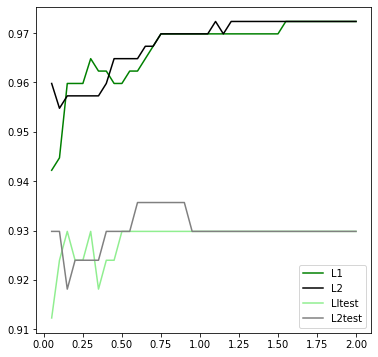

In [17]:
l1=[]
l2=[]
l1test=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,2,40):
    lrl1=LR(penalty='l1',solver='liblinear',C=i,max_iter=1000)
    lrl2=LR(penalty='l2',solver='liblinear',C=i,max_iter=1000)
  
    
    lrl1=lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    
    
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))

graph =[l1,l2,l1test,l2test] 
color=["green","black","lightgreen","gray"]
label=["L1","L2","Lltest","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,2,40),graph[i],color[i],label=label[i])
plt.legend(loc=4)#图例的位置显示  4表示右下角
plt.show()

In [14]:
np.linspace(0.05,2,40)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  ])

可见，至少在我们的乳腺癌数据集下，两种正则化的结果区别不大。但随着C的逐渐变大，正则化的强度越来越小，模型在训练集和测试集上的表现都呈上升趋势，直到C=0.8左右，训练集上的表现依然在走高，但模型在未知数据集上的表现开始下跌，这时候就是出现了过拟合。我们可以认为，C设定为0.9会比较好。在实际使用时，基本就默认使用l2正则化，如果感觉到模型的效果不好，那就换L1试试看。

In [13]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [10]:
# 嵌入法进行特征选择
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [11]:
data=load_breast_cancer()

In [12]:
data.data.shape
X=data.data
y=data.target

In [13]:
LR=LR(solver='liblinear',C=0.8,random_state=420)

In [14]:
cross_val_score(LR,X,y,cv=10).mean()

0.9508145363408522

In [15]:
# threshold=None重要性小于它的都去掉
X_embedded=SelectFromModel(LR,norm_order=1).fit_transform(data.data,data.target)

In [16]:
X_embedded.shape

(569, 9)

In [17]:
# 特征降低到9个
cross_val_score(LR,X_embedded,data.target,cv=10).mean()

0.9368107769423559

In [18]:
abs(LR.fit(data.data,data.target).coef_).max()


1.9407060939100667

In [19]:
# 调节门限 筛选特征
fullx=[]
fsx=[]
# 此时，用的判断指标，不是L1范数，而是逻辑回归中系数了
threshold =np.linspace(0,abs(LR.fit(data.data,data.target).coef_).max(),20)

# 循环列表索引
m=0
for i in threshold:
    X_embedded=SelectFromModel(LR,threshold=i,norm_order=1).fit_transform(data.data,data.target)
    fullx.append(cross_val_score(LR,data.data,data.target,cv=5).mean())
    fsx.append(cross_val_score(LR,X_embedded,data.target,cv=5).mean())
    print((threshold[m],X_embedded.shape[1])
    m=m+1
          
plt.figure(figsize=(20,5))
plt.plot(threshold,fullx,label='full')
plt.plot(threshold,fsx,label='feature selection')
plt.xticks(threshold)
plt.legend()
plt.show()

#上面代码有错误


0.9561090225563911 6.01


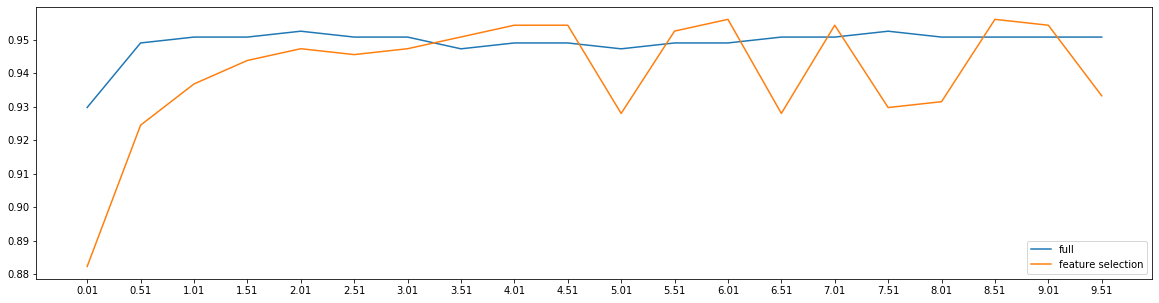

In [20]:
from sklearn.linear_model import LogisticRegression as LR
# 第二种调整方法，调整逻辑回归中的C，画出C的学习曲线
fullx=[]
fsx=[]

C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_=LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label='full')
plt.plot(C,fsx,label='feature selection')
plt.xticks(C)
plt.legend()
plt.show()

0.9561090225563911 5.699999999999986


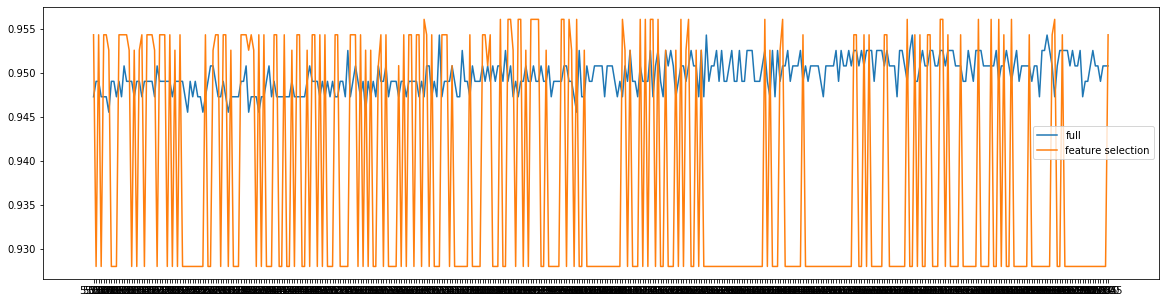

In [21]:
from sklearn.linear_model import LogisticRegression as LR
# 第二种调整方法，调整逻辑回归中的C，细分C
fullx=[]
fsx=[]

C=np.arange(5.05,7.05,0.005)
for i in C:
    LR_=LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
    
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label='full')
plt.plot(C,fsx,label='feature selection')
plt.xticks(C)
plt.legend()
plt.show()

In [22]:
LR_=LR(solver='liblinear',C=5.699999999999986,random_state=420)
cross_val_score(LR_,data.data,data.target,cv=10).mean()

0.9473057644110275

In [23]:
LR_=LR(solver='liblinear',C=5.699999999999986,random_state=420)
X_embedded=SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
cross_val_score(LR_,X_embedded,data.target,cv=10).mean()

0.9561090225563911

In [24]:
X_embedded.shape

(569, 9)

In [1]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
data=load_breast_cancer()
X=data.data
y=data.target

In [2]:
# 迭代次数学习曲线，控制步长
l2=[]
l2test=[]
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,y,test_size=0.3,random_state=420)

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


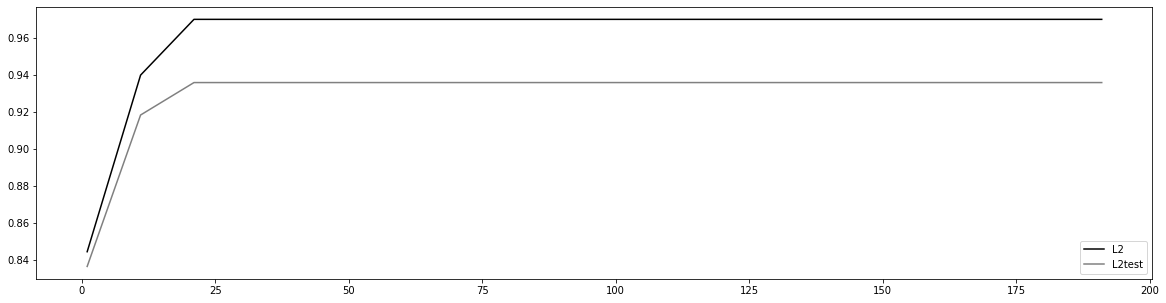

In [3]:
for i in np.arange(1,201,10):
    lrl2=LR(penalty='l2',solver='liblinear',C=0.8,max_iter=i)
    
    lrl2=lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
    
graph=[l2,l2test]
color=['black','gray']
label=['L2',"L2test"]
plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()

In [4]:
# 属性lr.n_iter_查看真正迭代的次数
lr=LR(penalty='l2',solver='liblinear',C=0.9,max_iter=10).fit(Xtrain,Ytrain)

D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [5]:
lr.n_iter_

array([10], dtype=int32)

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()

In [11]:
for multi_class in ('multinomial','ovr'):
    lr=LR(solver='sag',max_iter=100,random_state=420,multi_class=multi_class).fit(iris.data,iris.target)
    print('training score : %.3f (%s)' %(lr.score(iris.data,iris.target),multi_class))

In [11]:
# 打印两种模式下训练分数
# %用法：%用来替换想替换的部分 %。3f保留三位小数，%s是字符串 
# 字符串后的是元组，字符串有几个百分号，就有几个填充

training score : 0.987 (multinomial)
training score : 0.960 (ovr)


D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
D:\ruanjiananzhuang\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
